# Amazon Food Reviews Sentiment Analysis

In this project we will be doing some sentiment analysis in python for Amazon Food product reviews using two different techniques: 

1. VADER(Valence Aware Dictionary and Sentiment Reasoner) - Bag of Words Approach
2. Roberta Pretrained Model from Huggingface Pipeline

# About Database
This dataset consists of reviews of fine foods from Amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

## Contents
- **Reviews.csv**: Pulled from the corresponding SQLite table named Reviews in `database.sqlite`.
- **database.sqlite**: Contains the table `Reviews`.

## Data includes:
- Reviews from Oct 1999 - Oct 2012.
- 568,454 reviews.
- 256,059 users.
- 74,258 products.
- 260 users with more than 50 reviews.h > 50 reviews

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

## Loading the Dataset

In [2]:
#Importing the reviews dataset
data = pd.read_csv(r"C:\Users\chitr\Desktop\DS Projects\Amazon Reviews Sentiment Analysis\archive (2)\Reviews.csv")

## EDA of the Dataset

In [3]:
print(data.shape)

(568454, 10)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [7]:
data['Score'].value_counts().sort_index()

Score
1     52268
2     29769
3     42640
4     80655
5    363122
Name: count, dtype: int64

Data is biased towards more five star reviews

## Sampling the Data

In [8]:
#Considering subset of the data for modeling
df = data.sample(5000)
print(df.shape)

(5000, 10)


In [9]:
#Count of reviews by Stars
counts = df['Score'].value_counts()
print(counts)

Score
5    3239
4     710
1     425
3     382
2     244
Name: count, dtype: int64


In [10]:
#Sorting by Index
sorted = counts.sort_index()
print(sorted)

Score
1     425
2     244
3     382
4     710
5    3239
Name: count, dtype: int64


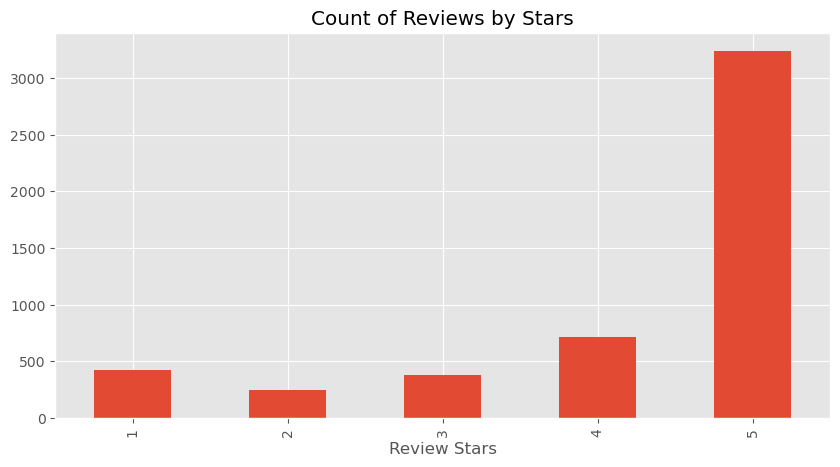

In [11]:
#Plotting the results
ax = sorted.plot(kind = 'bar', title = 'Count of Reviews by Stars', figsize = (10,5))
ax.set_xlabel('Review Stars')
plt.show()

In [12]:
#Example case
example = df.iloc[50,9]
print(example)

I normally do not like "crunchy" bars because its a hit and miss proposition. Sometimes too hard, sometimes too soft (feel like Goldilocks). But the taste and texture gets a passing grade from me. Will buy more.


In [13]:
#Downloading the 'punkt' Tokenizer Models
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chitr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
#Tokenizing the text
tokens = nltk.word_tokenize(example)
type(tokens)

#Displaying the first 10 tokenized elements
tokens[:10]

['I',
 'normally',
 'do',
 'not',
 'like',
 '``',
 'crunchy',
 "''",
 'bars',
 'because']

In [15]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\chitr\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [16]:
#Part of Speech Tagging of the tokens
tagged = nltk.pos_tag(tokens)
tagged

[('I', 'PRP'),
 ('normally', 'RB'),
 ('do', 'VBP'),
 ('not', 'RB'),
 ('like', 'IN'),
 ('``', '``'),
 ('crunchy', 'NN'),
 ("''", "''"),
 ('bars', 'NNS'),
 ('because', 'IN'),
 ('its', 'PRP$'),
 ('a', 'DT'),
 ('hit', 'NN'),
 ('and', 'CC'),
 ('miss', 'JJ'),
 ('proposition', 'NN'),
 ('.', '.'),
 ('Sometimes', 'RB'),
 ('too', 'RB'),
 ('hard', 'JJ'),
 (',', ','),
 ('sometimes', 'RB'),
 ('too', 'RB'),
 ('soft', 'JJ'),
 ('(', '('),
 ('feel', 'VB'),
 ('like', 'IN'),
 ('Goldilocks', 'NNP'),
 (')', ')'),
 ('.', '.'),
 ('But', 'CC'),
 ('the', 'DT'),
 ('taste', 'NN'),
 ('and', 'CC'),
 ('texture', 'NN'),
 ('gets', 'VBZ'),
 ('a', 'DT'),
 ('passing', 'NN'),
 ('grade', 'NN'),
 ('from', 'IN'),
 ('me', 'PRP'),
 ('.', '.'),
 ('Will', 'MD'),
 ('buy', 'VB'),
 ('more', 'RBR'),
 ('.', '.')]

In [17]:
#Downloading words for Chunk function
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\chitr\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [18]:
#Tagging to entities
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  normally/RB
  do/VBP
  not/RB
  like/IN
  ``/``
  crunchy/NN
  ''/''
  bars/NNS
  because/IN
  its/PRP$
  a/DT
  hit/NN
  and/CC
  miss/JJ
  proposition/NN
  ./.
  Sometimes/RB
  too/RB
  hard/JJ
  ,/,
  sometimes/RB
  too/RB
  soft/JJ
  (/(
  feel/VB
  like/IN
  (ORGANIZATION Goldilocks/NNP)
  )/)
  ./.
  But/CC
  the/DT
  taste/NN
  and/CC
  texture/NN
  gets/VBZ
  a/DT
  passing/NN
  grade/NN
  from/IN
  me/PRP
  ./.
  Will/MD
  buy/VB
  more/RBR
  ./.)


## Approach 1: VADER Sentiment Scoring

We will use NLTK's SentimentIntensityAnalyzer to get the Negative, Neutral, and Positive scores of the text.

This uses a "bag of words" approach:

1. Stop words are removed.
2. Each word is scored and combined to a total score.ore.

In [19]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [20]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [21]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [22]:
sia.polarity_scores(example)

{'neg': 0.158, 'neu': 0.842, 'pos': 0.0, 'compound': -0.3839}

In [23]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [24]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [25]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,355240,0.152,0.780,0.069,-0.4760,B000FL3I5I,A3DBUYS12UO2ZI,"Gail M. Curren ""health nut""",10,11,2,1169251200,STICKY MESS!,Taste great but the cap on the bottle doesn't ...
1,66883,0.000,0.816,0.184,0.9736,B006J4MAIQ,A3LZIEBNSAYEOB,KitchenMD,0,0,5,1346630400,Feels like I am eating yummy carrot cake,OMG! This is the best granola ever. I love c...
2,285638,0.087,0.772,0.141,0.3818,B003TIWQQQ,A31HAPN6YPWMJ5,jds,0,0,3,1342310400,Chocolate chip much better,Chocolate Chip is more moist and tasty. My kid...
3,253703,0.000,0.909,0.091,0.4588,B000FPGYTQ,A1LSN5MW3MQ3EG,smiley,0,1,5,1308009600,So tasty!!!,"First, I don't have any children. In my mid 20..."
4,322042,0.038,0.647,0.315,0.9399,B0012V1G0Y,A14AW9Y57OPQD3,Bamablondie1,0,0,5,1295049600,Best Dog toy!!!,My dogs love this! Would highly recommend. Has...


## Plot VADER Results

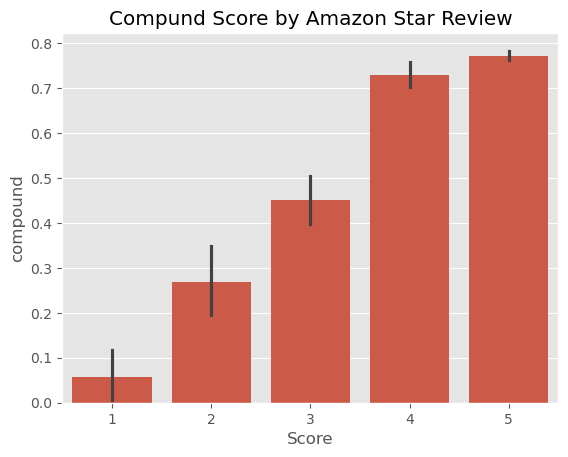

In [26]:
#Density plot of the scores assigned for each category of review by the VADER Model
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compund Score by Amazon Star Review')
plt.show()

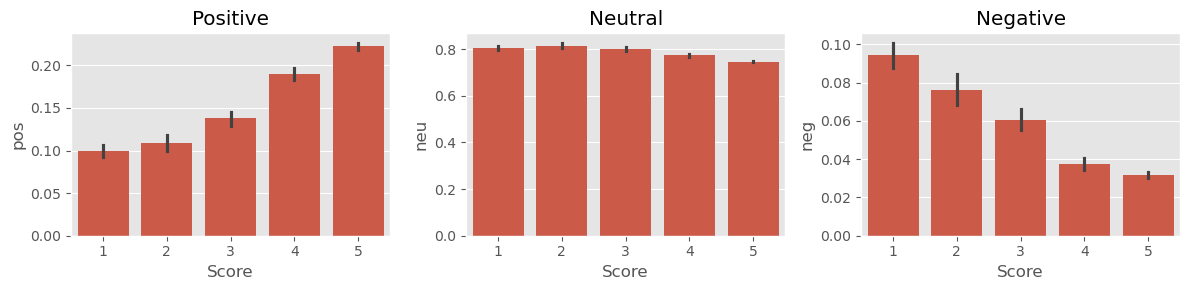

In [27]:
#Plotting for each category
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## Approach 2: Using the Roberta Pretrained Model

1. Use a model trained of a large corpus of data.
2. Transformer models account for the words but also the context related to other words.

In [28]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [29]:
import torch

In [30]:
#Loading the model
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

C:\Users\chitr\anaconda3\lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\chitr\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [31]:
# VADER results on example
print(example)
sia.polarity_scores(example)

I normally do not like "crunchy" bars because its a hit and miss proposition. Sometimes too hard, sometimes too soft (feel like Goldilocks). But the taste and texture gets a passing grade from me. Will buy more.


{'neg': 0.158, 'neu': 0.842, 'pos': 0.0, 'compound': -0.3839}

In [32]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.6273501, 'roberta_neu': 0.3079928, 'roberta_pos': 0.0646571}


In [33]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [34]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/5000 [00:00<?, ?it/s]

Broke for id 134423
Broke for id 381820
Broke for id 252365
Broke for id 237740
Broke for id 147931
Broke for id 25473
Broke for id 13095
Broke for id 557198
Broke for id 255742
Broke for id 75741
Broke for id 222452
Broke for id 418978
Broke for id 135273
Broke for id 354976
Broke for id 376542
Broke for id 396623
Broke for id 133108
Broke for id 414118
Broke for id 257963
Broke for id 525964
Broke for id 394094
Broke for id 382518
Broke for id 400885
Broke for id 202457
Broke for id 513440
Broke for id 374395
Broke for id 343658
Broke for id 337055
Broke for id 148462
Broke for id 472729
Broke for id 253093
Broke for id 321714
Broke for id 78146
Broke for id 463188
Broke for id 516610
Broke for id 209102
Broke for id 238749
Broke for id 62959
Broke for id 152282
Broke for id 455470
Broke for id 496956
Broke for id 334143
Broke for id 80087
Broke for id 500057
Broke for id 312559
Broke for id 120135
Broke for id 294924


In [35]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

## Comparing Scores between Models

In [36]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

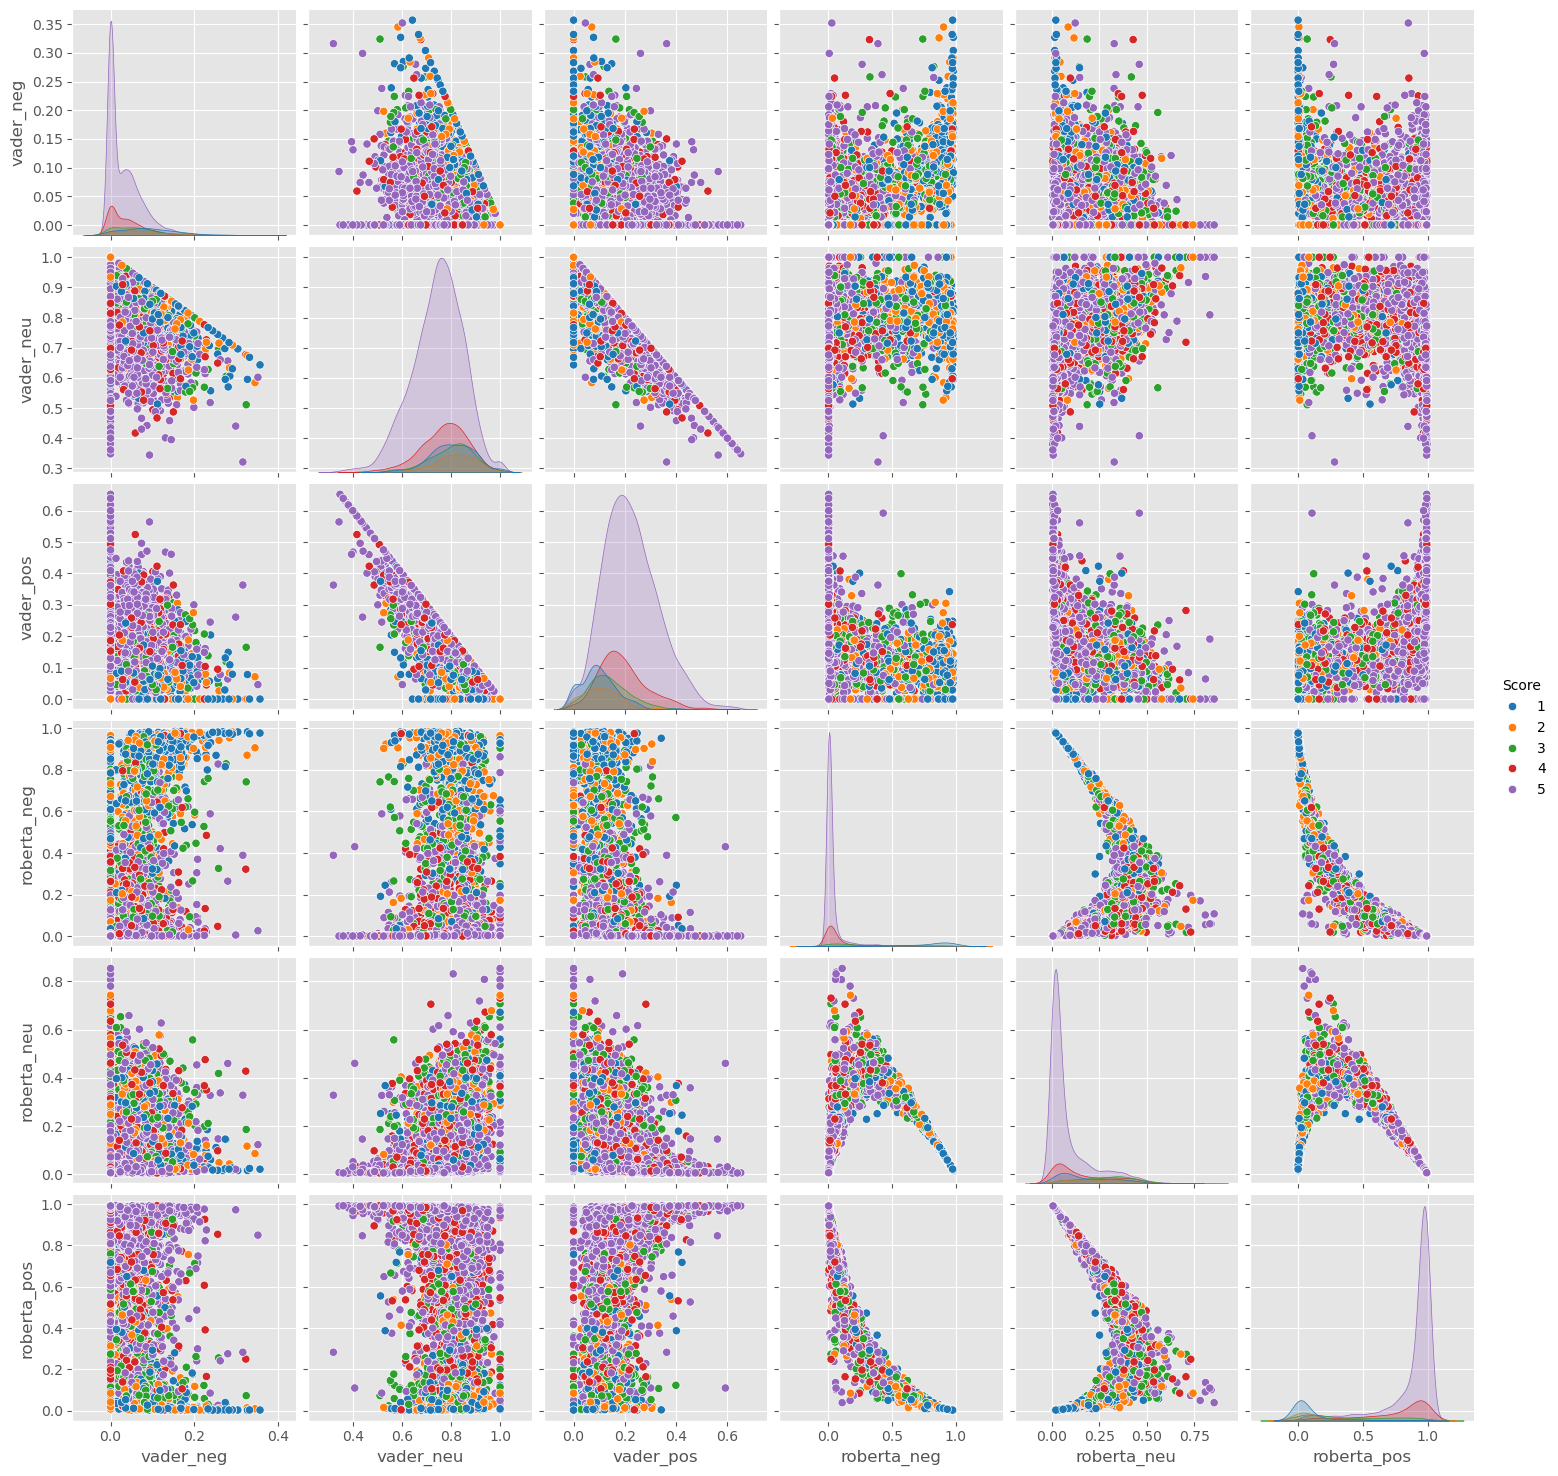

In [37]:
### Combine both the models and compare
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

## Review Examples

In [38]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

'I love this stuff but $6+ for one container is rediculous.  Save yourself some cash by purchasing one of the other Sugar Free flavors (6 pack) and just add a bit of coco powder to the container of Coffee Mate powder and shake a few times.  Almost Perfect and much less cash spent.'

In [39]:
results_df.query('Score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

'Ordered this product hoping I would get a true bold coffee out of my Keurig, this tasted like freeze dried coffee. My search continues!!'

In [43]:
#Comparing the 5 star review with their maximum Negative Score for both the models

In [41]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

"This is an edit so I was unable to change my star rating.  At first I was happy with this canned cat food until the trouble began.  It has caused severe diarrhea in both of my cats who were eating it.  Now I'm in the process of trying to get things back on track.  As anyone who has been in this situation knows, the negative impacts of the situation affect the entire household, not just the poor cats who are suffering from it."

In [42]:
results_df.query('Score == 5') \
    .sort_values('vader_neg', ascending=False)['Text'].values[0]

'Like all Just Tomatoes products, these are really tasty, but NOT very sweet (for sweet, go with the Just Strawberries). No problems vis-a-vis dental work, though I suppose YMMV.'